In [1]:
# import some libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
# read in data
df = pd.read_csv('deathrate.csv')

# defining new column: percent poverty
df['pct_poverty'] = df.Poverty / df.Population

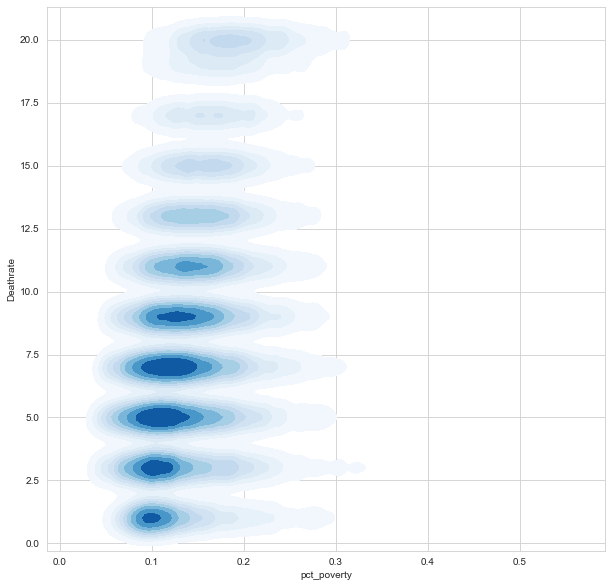

In [3]:
# let's look at the relationship between Poverty Rate and Deathrate
sns.kdeplot(x = df.pct_poverty, y = df.Deathrate, cmap = "Blues", shade = True, bw_adjust = .5)
plt.show()

Here, we don't see a clear association between poverty rate and deathrate.

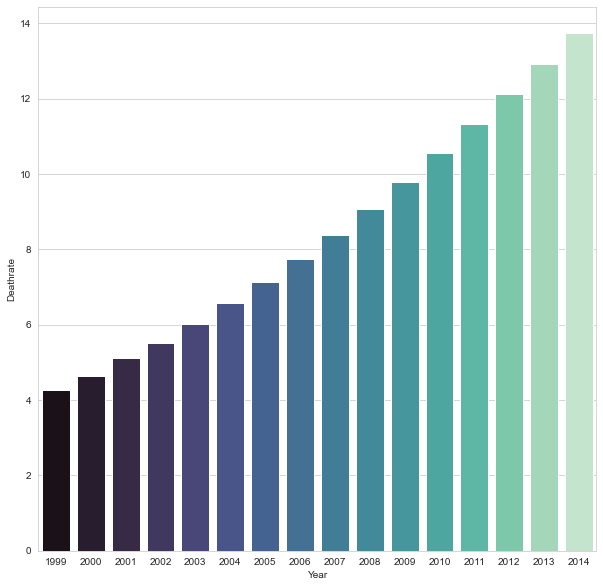

In [4]:
avg_dr_yr = df.groupby('Year', as_index = False).Deathrate.mean()
sns.barplot(data = avg_dr_yr, x = 'Year', y = 'Deathrate', palette = 'mako')
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Poverty'>

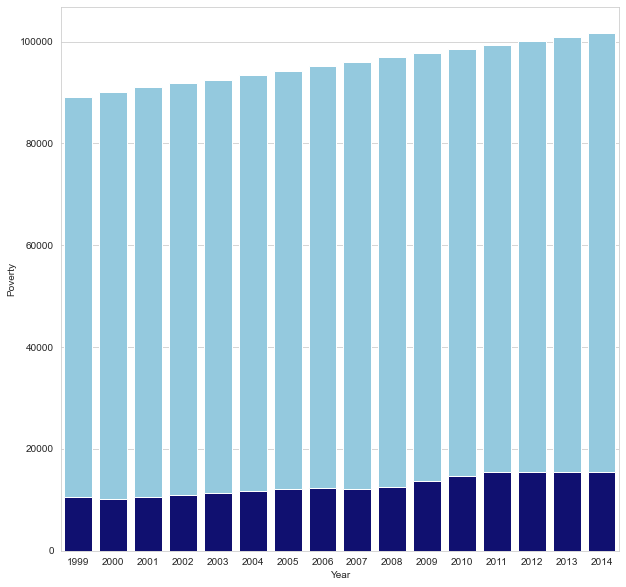

In [5]:
avg_pop_yr = df.groupby('Year', as_index = False).Population.mean()
avg_pov_yr = df.groupby('Year', as_index = False).Poverty.mean()
sns.barplot(data = avg_pop_yr, x = 'Year', y = 'Population', color = 'skyblue')
sns.barplot(data = avg_pov_yr, x = 'Year', y = 'Poverty', color = 'navy')

In [6]:
states = []
for i in df.County:
    state = i[-2:]
    states.append(state)
df['state'] = states
avg_st_dr = df.groupby('state', as_index = False).Deathrate.mean()
avg_st_pov = df.groupby('state', as_index = False).Poverty.mean()

<AxesSubplot:xlabel='Deathrate', ylabel='state'>

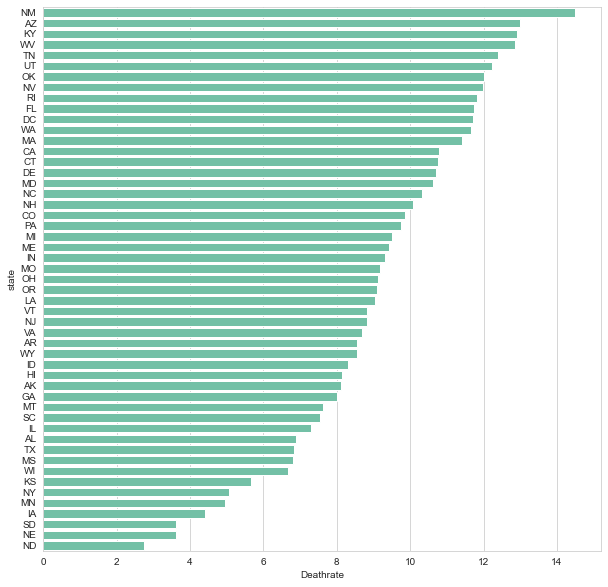

In [7]:
sns.barplot(data = avg_st_dr, x = 'Deathrate', y = 'state', orient = 'h', color = 'mediumaquamarine',\
           order = avg_st_dr.sort_values('Deathrate', ascending = False).state)

<AxesSubplot:xlabel='Poverty', ylabel='state'>

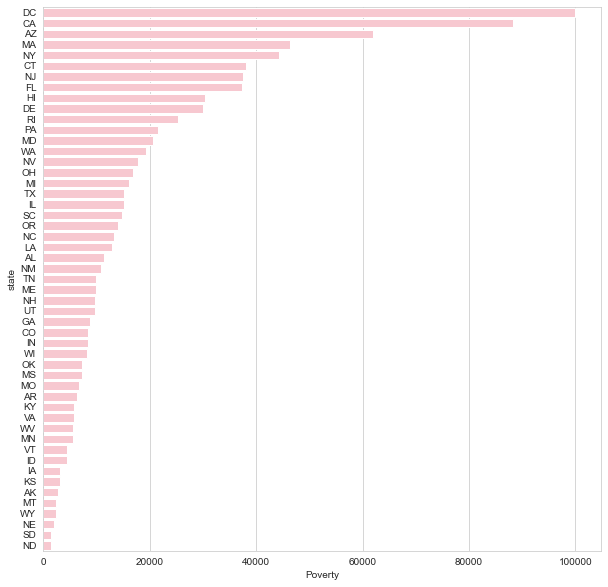

In [8]:
sns.barplot(data = avg_st_pov, x = 'Poverty', y = 'state', orient = 'h', color = 'pink',\
           order = avg_st_pov.sort_values('Poverty', ascending = False).state)